In [ ]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


In [ ]:
import io
supermarketdata = pd.read_csv(io.BytesIO(uploaded['supermarket_sales - Sheet1.csv']))
del supermarketdata['gross margin percentage']
supermarketdata.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


In [ ]:
supermarketdata.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

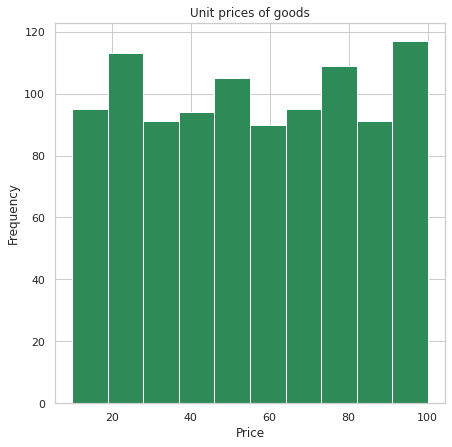

In [ ]:
from google.colab import files
plt.figure(figsize=(7, 7))
plt.hist(supermarketdata['Unit price'], color = 'seagreen')
plt.title('Unit prices of goods')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig("priceplot.png")
files.download("priceplot.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

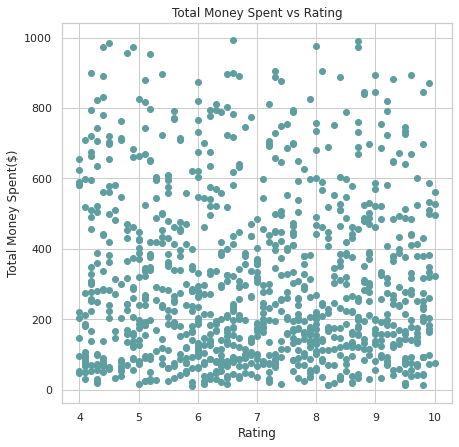

In [ ]:
plt.figure(figsize = (7,7))
plt.scatter(supermarketdata['Rating'], supermarketdata['cogs'], color = 'cadetblue')
plt.title('Total Money Spent vs Rating')
plt.xlabel('Rating')
plt.ylabel('Total Money Spent($)')
plt.savefig("moneyspent_vs_rating.png")
files.download("moneyspent_vs_rating.png") 

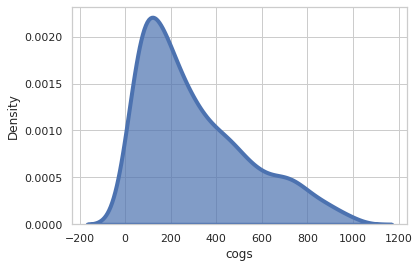

In [ ]:
sns.kdeplot(
   data=supermarketdata, #the dataset you are using
   x="cogs", #the column you are referencing
   #the column that you are using to color code/break up the data
   fill=True, #whether or not you want the plot to be filled in (default is False)
   palette="crest", #color palette you are using
   alpha= .7 , #transparency : alpha = 1 is opaque
   linewidth= 4, #width of the borders of each dsitribution
)

In [ ]:
# create X and y
feature_col = ['Rating']
X = supermarketdata[feature_col] 
y = supermarketdata['Unit price']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
# unit price = 56.62 - 0.14(rating)
# print the coefficients
print("The y intercept:", linreg.intercept_)
print("The single coefficient:", list(zip(feature_col,linreg.coef_)))
# evaluate R^2
y_pred = linreg.predict(X)
print("R^2: ", metrics.r2_score(y, y_pred))

# Evaluate MSE
print("MSE: ", metrics.mean_squared_error(y, y_pred))

The y intercept: 56.61566970114002
The single coefficient: [('Rating', -0.1353191304860415)]
R^2:  7.704463265967298e-05
MSE:  701.2093373846717
